In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helpers
from implementations import *
import pandas as pd

In [4]:
x_train, x_test, y_train, train_ids, test_ids = helpers.load_csv_data("data/dataset")

# Using a Chi-squared test to determine the important features

In [ ]:
# Define a function to calculate the chi-squared values for all features
def chi2_features(X, y):
    chi2_scores = []
    for feature in range(X.shape[1]):
        # Create a contingency table
        contingency_table = np.zeros((2, 2))
        for i in range(2):
            for j in range(2):
                # Count occurrences for each combination of feature and target
                contingency_table[i, j] = np.sum((X[:, feature] == i) & (y == j))
        # Calculate the chi-squared statistic
        chi2 = np.sum((contingency_table - np.mean(contingency_table))**2 / np.mean(contingency_table))
        chi2_scores.append(chi2)
    return chi2_scores

# Calculate chi-squared values for all features
chi2_scores = chi2_features(x_train, y_train)

# Specify the number of top features to select (k)
k = 20

# Get the indices of the top k features with the highest chi-squared scores
selected_feature_indices = np.argsort(chi2_scores)[-k:]

print(selected_feature_indices)

In [5]:
chosen_indices = [20,26,27,32,33,34,35,36,38,39,42,43,45,48,50,65,66,69,72,73,77]
best_x_train = x_train[:, chosen_indices]
# 20 (CADULT), 26 (GENHLTH), 27 (PHYSHLTH), 32 (MEDCOST), 33 (CHECKUP1), 34 (BPHIGH4), 35 (BPMEDS), 36 (BLOODCHO), 38 (TOLDHI2), 39 (CVDSTRK3),
# 42 (CHCSCNCR), 43 (CHCOCNCR), 45 (HAVARTH3), 48 (DIABETE3), 50 (SEX), 65 (QLACTLM2),
# 66 (USEEQUIP), 69 (DIFFWALK), 72 (SMOKE100), 73 (SMOKDAY2), 77 (ALCDAY5)  
best_x_train

array([[  2.,   2.,   1., ...,   1.,   1., 888.],
       [ nan,   4.,  88., ...,   1.,   1., 107.],
       [ nan,   2.,  77., ...,   1.,   3., 204.],
       ...,
       [ nan,   3.,  88., ...,   2.,  nan, 888.],
       [ nan,   3.,  88., ...,   2.,  nan, 888.],
       [ nan,   2.,   7., ...,   2.,  nan, 888.]])

In [6]:
print("Number of nan values \n")

# Count the nan values in each column in the best_x_train
for i in range(len(best_x_train[1])):
    print("Column %d: %d" % (i, np.isnan(best_x_train[:, i]).sum()))

# Print the length of the best_x_train
print("\nLength of best_x_train: %d" % len(best_x_train))

Number of nan values 

Column 0: 188721
Column 1: 2
Column 2: 1
Column 3: 1
Column 4: 1
Column 5: 1
Column 6: 196334
Column 7: 0
Column 8: 43801
Column 9: 0
Column 10: 1
Column 11: 0
Column 12: 1
Column 13: 5
Column 14: 0
Column 15: 6933
Column 16: 7743
Column 17: 9149
Column 18: 10541
Column 19: 191379
Column 20: 11765

Length of best_x_train: 328135


# NaN handling

In [7]:
# Column 0
def change_nan(best_x_train):
    for i in range(len(best_x_train)):
        if np.isnan(best_x_train[i, 0]): # CADULT
            best_x_train[i, 0] = 0
        if np.isnan(best_x_train[i, 1]): # GENHLTH
            best_x_train[i, 1] = 4
        if np.isnan(best_x_train[i, 2]): # PHYSHLTH
            best_x_train[i, 2] = 77
        if np.isnan(best_x_train[i, 3]): # MEDCOST
            best_x_train[i, 3] = 7
        if np.isnan(best_x_train[i, 4]): # CHECKUP1
            best_x_train[i, 4] = 7
        if np.isnan(best_x_train[i, 5]): # BPHIGH4
            best_x_train[i, 5] = 7
        if np.isnan(best_x_train[i, 6]): # BPMEDS
            best_x_train[i, 6] = 7
        if np.isnan(best_x_train[i, 7]): # BLOODCHO
            best_x_train[i, 7] = 7
        if np.isnan(best_x_train[i, 8]): # TOLDHI2
            best_x_train[i, 8] = 7
        if np.isnan(best_x_train[i, 9]): # CVDSTRK3
            best_x_train[i, 9] = 7
        if np.isnan(best_x_train[i, 10]): # CHCSCNCR
            best_x_train[i, 10] = 7
        if np.isnan(best_x_train[i, 11]): # CHCOCNCR
            best_x_train[i, 11] = 7
        if np.isnan(best_x_train[i, 12]): # HAVARTH3
            best_x_train[i, 12] = 7
        if np.isnan(best_x_train[i, 13]): # DIABETE3
            best_x_train[i, 13] = 7
        if np.isnan(best_x_train[i, 14]): # SEX
            best_x_train[i, 14] = -1
        if np.isnan(best_x_train[i, 15]): # QLACTLM2
            best_x_train[i, 15] = 7
        if np.isnan(best_x_train[i, 16]): # USEEQUIP
            best_x_train[i, 16] = 7
        if np.isnan(best_x_train[i, 17]): # DIFFWALK
            best_x_train[i, 17] = 7
        if np.isnan(best_x_train[i, 18]): # SMOKE100
            best_x_train[i, 18] = 7
        if np.isnan(best_x_train[i, 19]): # SMOKDAY2
            best_x_train[i, 19] = 7
        if np.isnan(best_x_train[i, 20]): # ALCDAY5
            best_x_train[i, 20] = 777
    
    return best_x_train

best_x_train = change_nan(best_x_train)
            

In [8]:
print("Number of nan values \n")

# Count the nan values in each column in the best_x_train
for i in range(len(best_x_train[1])):
    print("Column %d: %d" % (i, np.isnan(best_x_train[:, i]).sum()))

Number of nan values 

Column 0: 0
Column 1: 0
Column 2: 0
Column 3: 0
Column 4: 0
Column 5: 0
Column 6: 0
Column 7: 0
Column 8: 0
Column 9: 0
Column 10: 0
Column 11: 0
Column 12: 0
Column 13: 0
Column 14: 0
Column 15: 0
Column 16: 0
Column 17: 0
Column 18: 0
Column 19: 0
Column 20: 0


# Rebalancing dataset

In [9]:
# Count proportions of -1 and 1 in y_train
total_number_neg1 = np.sum(y_train == -1)
print("\nNumber of -1 in y_train: %.4f" % (total_number_neg1/len(y_train) * 100))


Number of -1 in y_train: 91.1698


In [10]:
# Choose the desired number of instances for each class
desired_majority_class = 0.20  # for -1
desired_minority_class = 1  # for 1

# Find the indices of the majority and minority classes
majority_indices = np.where(y_train == -1)[0]
minority_indices = np.where(y_train == 1)[0]

# Calculate the number of samples to keep for each class
num_samples_majority = int(desired_majority_class * len(majority_indices))
num_samples_minority = int(desired_minority_class * len(minority_indices))

# Randomly undersample the majority class
undersampled_majority_indices = np.random.choice(majority_indices, size=num_samples_majority, replace=False)

# Create balanced dataset by combining the minority and undersampled majority class
balanced_indices = np.concatenate((minority_indices, undersampled_majority_indices))

# Sort the indices to keep the same order as the original dataset
balanced_indices = np.sort(balanced_indices)

# Use these indices to extract the corresponding data points and labels
X_balanced = best_x_train[balanced_indices]
y_balanced = y_train[balanced_indices]

# Calculate the proportion of each class in the rebalanced dataset
proportion_majority_class = np.sum(y_balanced == -1) / len(y_balanced)
proportion_minority_class = np.sum(y_balanced == 1) / len(y_balanced)

print("Proportion of majority class (-1) in rebalanced dataset:", proportion_majority_class)
print("Proportion of minority class (1) in rebalanced dataset:", proportion_minority_class)


Proportion of majority class (-1) in rebalanced dataset: 0.6737306743837761
Proportion of minority class (1) in rebalanced dataset: 0.32626932561622396


# Split the data into training and validation sets

In [ ]:
# X_train are the first 80% of the data points
# X_val are the remaining 20%
X_train = X_balanced[:int(0.8 * len(X_balanced))]
X_val = X_balanced[int(0.8 * len(X_balanced)):]

# y_train are the first 80% of the labels
# y_val are the remaining 20%
Y_train = y_balanced[:int(0.8 * len(y_balanced))]
Y_val = y_balanced[int(0.8 * len(y_balanced)):]

# Training model

In [12]:
tx = X_train
y = Y_train.reshape(-1,)

In [30]:
w_s=[]
losses=[]

# Number of features
num_features = tx.shape[1]

""" # Initialize weights randomly
w = np.random.uniform(-1, 1, (num_features,)) """

""" # Initialize weights using Xavier/Glorot initialization
w = np.random.uniform(-np.sqrt(6.0 / (num_features + 1)), np.sqrt(6.0 / (num_features + 1)), (num_features,)) """

# Initialize weights to near zero
w = np.full((num_features ,), 1e-16) 

max_iters=200
accs=[]
precs=[]
recs=[]
F1s=[]
batch_size = 1
lambda_ = 1e-3
gamma = 0.00005

for i in range(max_iters):

    #1) mean_squared_error_gd
    #w, loss = mean_squared_error_gd(y, tx, w, max_iters, gamma)

    #2) mean_squared_error_sgd
    #w, loss = mean_squared_error_sgd(y, tx, w, max_iters, gamma,  batch_size, num_batches=1) 

    #3) least_squares
    #w, loss = least_squares(y, tx)  # change input data here, matrix is not invertible[10, 12, 14/15/20/69]

    #4) ridge_regression
    #w, loss = ridge_regression(y, tx, lambda_)

    #5) logistic_regression
    w, loss = logistic_regression_minusone_one(y, tx, w, max_iters, gamma)

    #6) reg_logistic_regression
    #w, loss = reg_logistic_regression(y, tx, lambda_, w, max_iters, gamma) 

    #7) logistic_regression with mini-batch
    #w, loss = logistic_regression_with_mb(y, tx, w, max_iters, gamma, batch_size)
 
    losses.append(loss)

 
    y_1 = X_val.dot(w)
    y_2 = compute_sigmoid(y_1)
    y_pred = y_2.copy()
    y_pred[y_2>0.5] = 1
    y_pred[y_2<=0.5] = -1
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and Y_val[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and Y_val[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and Y_val[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)


    if acc > 0.75 :
        w_s.append(w)

    accs.append(acc)
    precs.append(prec)
    recs.append(recs)
    F1s.append(F1score)
    conf_matrix = np.array([[TP, FP], [FN, TN]])
    print(f"Iteration {i} of {max_iters} finished.")
    print(f"Accuracy : {acc}, Loss : {loss}, F1score : {F1score}")
        
w_s = np.asarray(w_s)
print("lambda = ",lambda_,"| Accuracy moyenne :",np.mean(accs),"| Acc>0.75 :",w_s.shape[0])


Iteration 0 of 200 finished.
Accuracy : 0.49567038634341887, Loss : 1.6127429207845465, F1score : 0.5138608488006078
Iteration 1 of 200 finished.
Accuracy : 0.4953663562557006, Loss : 1.778360384026812, F1score : 0.5177085911688424
Iteration 2 of 200 finished.
Accuracy : 0.6547006429673337, Loss : 0.6080788071141223, F1score : 0.281833298203705
Iteration 3 of 200 finished.
Accuracy : 0.6568513743286002, Loss : 0.6039465421754622, F1score : 0.2735637663885578
Iteration 4 of 200 finished.
Accuracy : 0.49688650669429213, Loss : 1.541024640740986, F1score : 0.5131943082521628
Iteration 5 of 200 finished.
Accuracy : 0.6817931018951209, Loss : 0.5981152972711772, F1score : 0.21158943168819574
Iteration 6 of 200 finished.
Accuracy : 0.6737306743837761, Loss : 0.6161709808749208, F1score : 0
Iteration 7 of 200 finished.
Accuracy : 0.6737306743837761, Loss : 0.7586656559975051, F1score : 0
Iteration 8 of 200 finished.
Accuracy : 0.6850473498710687, Loss : 0.5884455682160245, F1score : 0.2108678

## Visualize the results

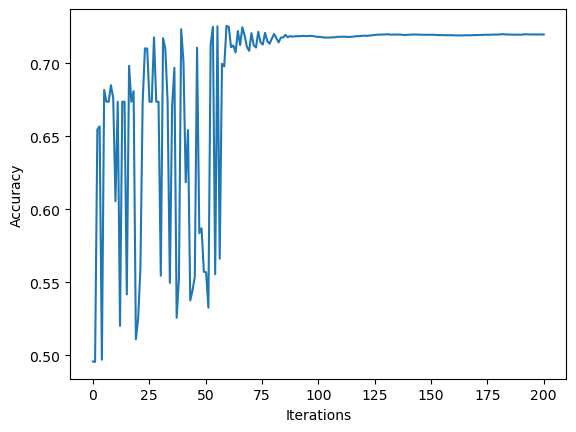

In [31]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
#plt.plot(np.linspace(0, max_iters, max_iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

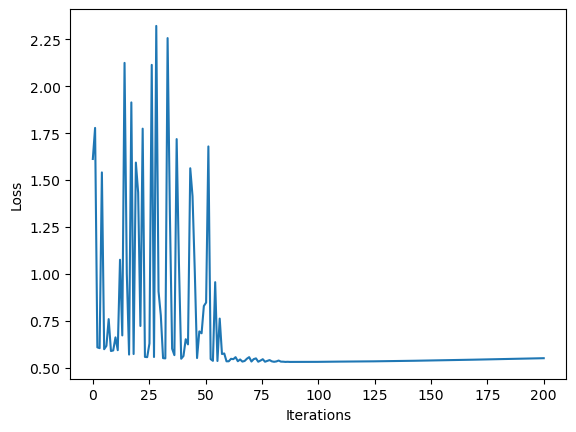

In [32]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

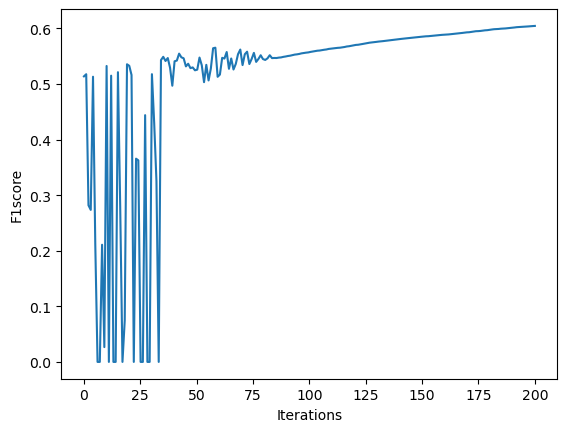

In [33]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), F1s)
plt.xlabel("Iterations")
plt.ylabel("F1score")
plt.show()

# Create submission file

In [35]:
best_x_test = x_test[:, chosen_indices]

# Handle nan values in the best_x_test
best_x_test = change_nan(best_x_test)
y_test = predict_y(w, best_x_test)

helpers.create_csv_submission(test_ids, y_test, "AI_crowd_submission_test")


## Evaluating all methods with different gamma

In [ ]:
# Calculate accuracy and f1, y corresponds to the correct y, tx and w are used to 
# calculate the predicted y
def calculate_acc_and_fone(y, tx, w):
    y_1 = tx.dot(w)
    y_2 = compute_sigmoid(y_1)
    y_pred = y_2.copy()
    y_pred[y_2>0.5] = 1
    y_pred[y_2<=0.5] = -1
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and y[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and y[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and y[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)

    return acc, F1score

# Calculate accuracy and f1, y corresponds to the correct y, y_pred is the predicted y
def calculate_acc_and_fone_baseline(y, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and y[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and y[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and y[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)

    return acc, F1score



In [ ]:

N, D = tx.shape

# divide dataset into train and test data in order to test prediction on other data than was used for testing
train_data_size = int(N/2)
local_test_data_size = N - train_data_size

x_local = tx[:train_data_size, :]
y_local = y[:train_data_size]
x_local_test = tx[train_data_size:, :]
y_local_test = y[train_data_size:]

initial_w = np.full((num_features,), 1e-3)

max_iters=100
batch_size = 1

gammas = np.array([0.1, 0.01, 0.001, 0.0001])

# Evaluate mean_squarred_error_gd
acc_mse_gd = []
f1_mse_gd = []
for gamma in gammas:
    w, loss = mean_squared_error_gd(y_local, x_local, initial_w, max_iters, gamma)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_mse_gd.append(acc)
    f1_mse_gd.append(f1)

# Evaluate mean_squared_error_sgd
acc_mse_sgd = []
f1_mse_sgd = []
for gamma in gammas:
    w, loss = mean_squared_error_sgd(y_local, x_local, initial_w, max_iters, gamma, batch_size=128, num_batches=16)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_mse_sgd.append(acc)
    f1_mse_sgd.append(f1)

# Evaluate least_squares
acc_least_squares = []
f1_least_squares = []
w, loss = least_squares(y_local, x_local)
acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
acc_least_squares.append(acc)
f1_least_squares.append(f1)


# Evaluate ridge_regression
acc_ridge = []
f1_ridge = []
w, loss = ridge_regression(y_local, x_local, lambda_)
acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
acc_ridge.append(acc)
f1_ridge.append(f1)

# Evaluate logistic_regression
acc_log_reg = []
f1_log_reg = []
for gamma in gammas:
    w, loss = logistic_regression(y_local, x_local, initial_w, max_iters, gamma)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_log_reg.append(acc)
    f1_log_reg.append(f1)

# Evaluate reg_logistic_regression
acc_reg_log_reg = []
f1_reg_log_reg = []
for gamma in gammas:
    w, loss = reg_logistic_regression(y_local, x_local, lambda_, initial_w, max_iters, gamma)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_reg_log_reg.append(acc)
    f1_reg_log_reg.append(f1)

# Evaluate baseline prediction
acc_baseline = []
f1_baseline = []
y_prediction = baseline_prediction(y_local_test)
acc, f1 = calculate_acc_and_fone_baseline(y_local_test, y_prediction)
acc_baseline.append(acc)
f1_baseline.append(f1)


In [ ]:
# Plot Accuracies for different gammas for all the evaluated methods
plt.figure()

plt.xscale('log')

plt.plot(gammas, acc_mse_gd, label="MSE with GD")
plt.plot(gammas, acc_mse_sgd, label="MSE with SGD")
plt.plot(gammas, 4* acc_least_squares, label="Least Squares")
plt.plot(gammas, 4* acc_ridge, label="Ridge Regression")
plt.plot(gammas, acc_log_reg, label="Logistic Regression")
plt.plot(gammas, acc_reg_log_reg, label="Regularized Logistic Regression")
plt.plot(gammas, 4* acc_baseline, label="Baseline Method")

plt.legend(loc="upper left")

plt.xlabel("Gamma")
plt.ylabel("Accuracy")

plt.grid(axis = 'y')

plt.show()

In [ ]:
# Plot F1 for different gammas for all the evaluated methods
plt.figure()

plt.xscale('log')

plt.plot(gammas, f1_mse_gd, label="MSE with GD")
plt.plot(gammas, f1_mse_sgd, label="MSE with SGD")
plt.plot(gammas, 4* f1_least_squares, label="Least Squares")
plt.plot(gammas, 4* f1_ridge, label="Ridge Regression")
plt.plot(gammas, f1_log_reg, label="Logistic Regression")
plt.plot(gammas, f1_reg_log_reg, label="Regularized Logistic Regression")
plt.plot(gammas, 4* f1_baseline, label="Baseline Method")

plt.legend(loc="upper left")

plt.xlabel("Gamma")
plt.ylabel("F1 Score")

plt.grid(axis = 'y')

plt.show()

In [ ]:
# Plot Accuracies and F1 for different gammas for the gradient descent methods
plt.figure()

plt.xscale('log')

plt.plot(gammas, acc_mse_gd, label="Accuracy MSE with GD", color="b")
plt.plot(gammas, f1_mse_gd, label="F1 MSE with GD", linestyle = 'dotted', color="b")
plt.plot(gammas, acc_mse_sgd, label="Accuracy MSE with SGD", color="g")
plt.plot(gammas, f1_mse_sgd, label="F1 MSE with SGD", linestyle = 'dotted', color="g")

plt.legend()

plt.xlabel("Gamma")
plt.ylabel("Accuracy and F1")

plt.grid(axis = 'y')

plt.show()

## Plotting features for linear separation

In [ ]:
# Plotting two features and their respective y value in a plot to visually
# inspect whether they are linearly separable

x_train, x_test, y_train, train_ids, test_ids = helpers.load_csv_data("data/dataset")

feature1 = 27 # Physhealth
feature2 = 28 # Mentalhealth

num_samples = 1500 # not plotting all the samples, such that the plot remains "readable"

ones = y_train==1
minus_ones = y_train==-1

ones = ones[:num_samples]
minus_ones = minus_ones[:num_samples]

x_points_one = x_train[:num_samples, feature1][ones]
x_points_minus_one = x_train[:num_samples, feature1][minus_ones]

y_points_one = x_train[:num_samples, feature2][ones]
y_points_minus_one = x_train[:num_samples, feature2][minus_ones]

plt.figure()

plt.scatter(x_points_one, y_points_one, color="r", label="points predicting one")
plt.scatter(x_points_minus_one, y_points_minus_one, color="b", label="points predicting minus one")

plt.legend()

plt.xlabel("Physical Health")
plt.ylabel("Mental Health")

plt.show()

